In [9]:
import pandas_datareader as pd_data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import math as m
import scipy as sp


In [10]:
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime(2020, 5, 31)

USyields = web.DataReader(['DGS1','DGS5','DGS10','DGS20','DGS30'], 'fred', start, end)


In [11]:
USyields.head()

,DGS1,DGS5,DGS10,DGS20,DGS30
DATE,,,,,
2000-01-03,6.09,6.50,6.58,6.94,6.61
2000-01-04,6.00,6.40,6.49,6.84,6.53
2000-01-05,6.05,6.51,6.62,6.95,6.64
2000-01-06,6.03,6.46,6.57,6.86,6.58
2000-01-07,6.00,6.42,6.52,6.82,6.55


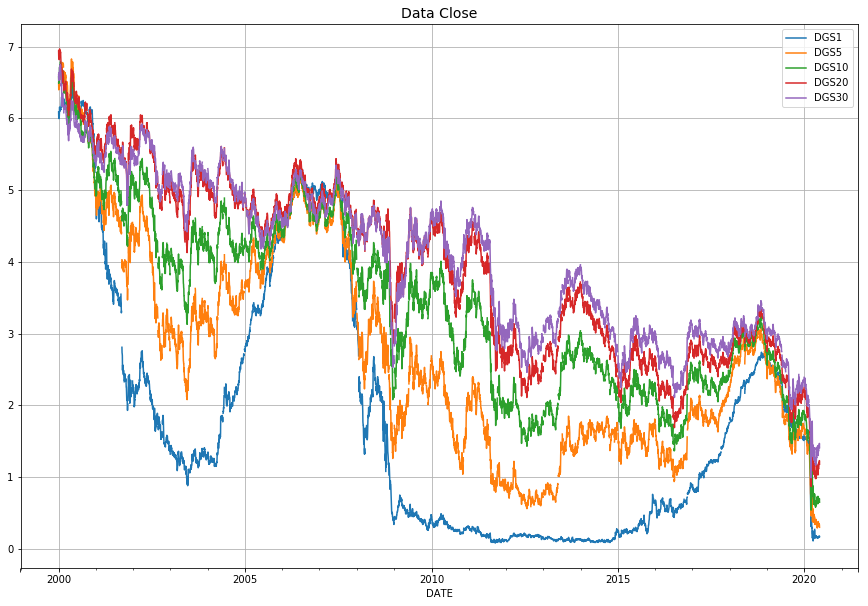

In [12]:
USyields.plot(figsize = (15, 10), grid = True)
plt.title('Data Close', fontsize=14)
plt.show()

In [14]:
USYieldsRtn = USyields.diff().dropna()
USYieldsRtn.head()

,DGS1,DGS5,DGS10,DGS20,DGS30
DATE,,,,,
2000-01-04,-0.09,-0.10,-0.09,-0.10,-0.08
2000-01-05,0.05,0.11,0.13,0.11,0.11
2000-01-06,-0.02,-0.05,-0.05,-0.09,-0.06
2000-01-07,-0.03,-0.04,-0.05,-0.04,-0.03
2000-01-10,0.07,0.07,0.05,0.04,0.04


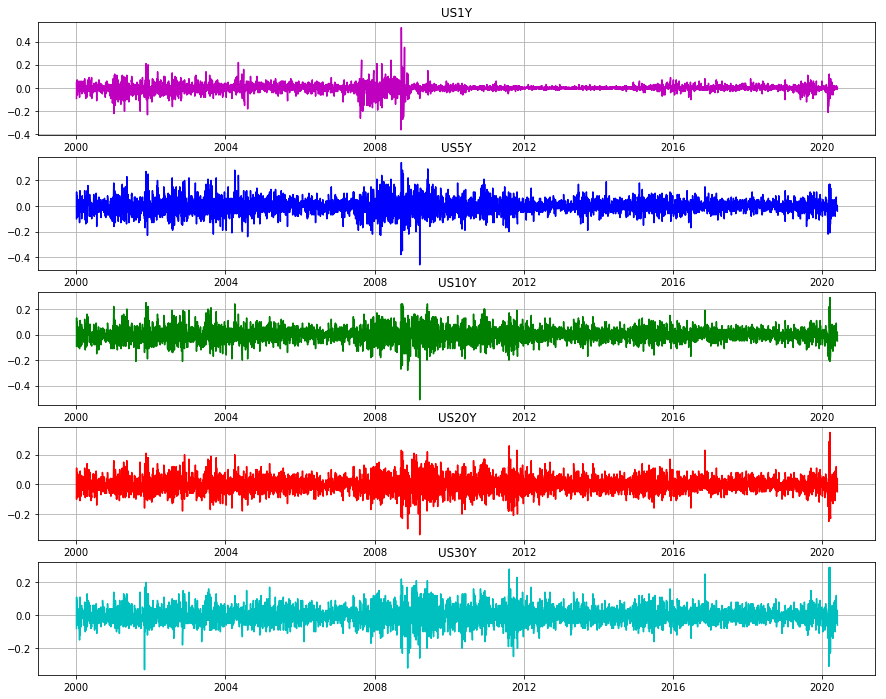

In [16]:
fig = plt.figure(figsize = (15,12))
ax1 = fig.add_subplot(5, 1, 1)
ax2 = fig.add_subplot(5, 1, 2)
ax3 = fig.add_subplot(5, 1, 3)
ax4 = fig.add_subplot(5, 1, 4)
ax5 = fig.add_subplot(5, 1, 5)

ax1.plot(USYieldsRtn['DGS1'], color ='m')
ax1.set_title('US1Y')
ax2.plot(USYieldsRtn['DGS5'], color = 'b')
ax2.set_title('US5Y')
ax3.plot(USYieldsRtn['DGS10'], color = 'g')
ax3.set_title('US10Y')
ax4.plot(USYieldsRtn['DGS20'], color = 'r')
ax4.set_title('US20Y')
ax5.plot(USYieldsRtn['DGS30'], color = 'c')
ax5.set_title('US30Y')

ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()
ax5.grid()


In [82]:
# Create a time series for 25 yiedl to show example.
np.random.seed(17)
std = USYieldsRtn['DGS5'].std()*0.4
rv = stats.norm(0,std)
n = len(USYieldsRtn['DGS1'])
z = rv.rvs(size = n)


USYieldsRtn['DGS25'] = USYieldsRtn['DGS5']*0.2 + USYieldsRtn['DGS20']*0.3 + USYieldsRtn['DGS30']*0.35+ z  

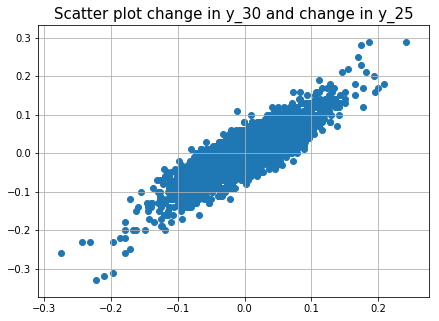

In [83]:
x = USYieldsRtn['DGS25']
y = USYieldsRtn['DGS30']

plt.figure(1, figsize=(7,5)) 
plt.scatter(x,y)
plt.title('Scatter plot change in y_30 and change in y_25', fontsize = 15)
plt.grid()
plt.savefig("OLS_Example1")

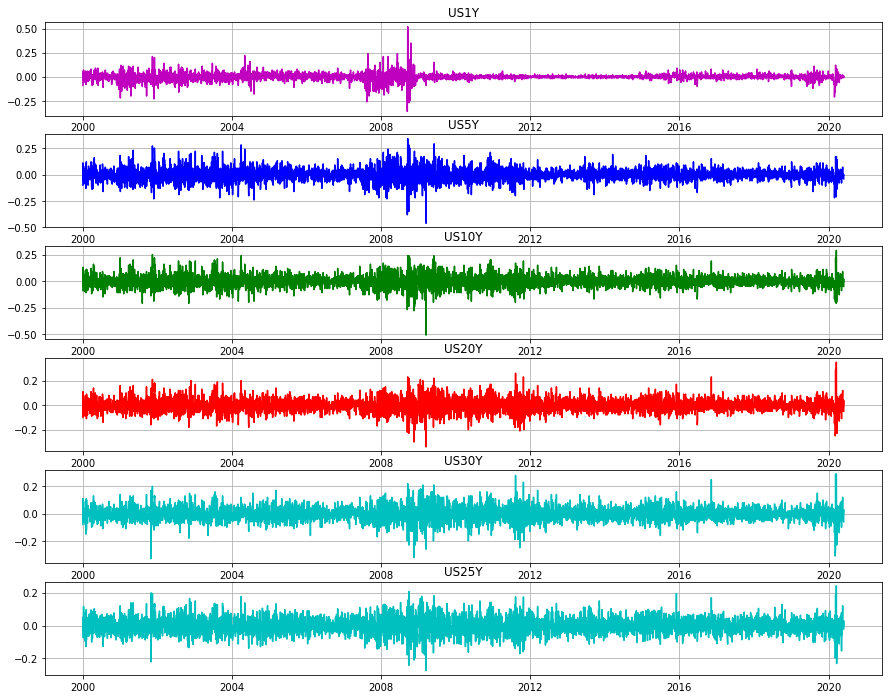

In [84]:
fig = plt.figure(figsize = (15,12))
ax1 = fig.add_subplot(6, 1, 1)
ax2 = fig.add_subplot(6, 1, 2)
ax3 = fig.add_subplot(6, 1, 3)
ax4 = fig.add_subplot(6, 1, 4)
ax5 = fig.add_subplot(6, 1, 5)
ax6 = fig.add_subplot(6, 1, 6)

ax1.plot(USYieldsRtn['DGS1'], color ='m')
ax1.set_title('US1Y')
ax2.plot(USYieldsRtn['DGS5'], color = 'b')
ax2.set_title('US5Y')
ax3.plot(USYieldsRtn['DGS10'], color = 'g')
ax3.set_title('US10Y')
ax4.plot(USYieldsRtn['DGS20'], color = 'r')
ax4.set_title('US20Y')
ax5.plot(USYieldsRtn['DGS30'], color = 'c')
ax5.set_title('US30Y')
ax6.plot(USYieldsRtn['DGS25'], color = 'c')
ax6.set_title('US25Y')

ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()
ax5.grid()
ax6.grid()


In [86]:
import statsmodels.api as sm

X = USYieldsRtn['DGS30']
y = USYieldsRtn['DGS25']

Xnew = sm.add_constant(X)
model_yield_2 = sm.OLS(y, Xnew).fit()
y_yield_2 = model_yield_2.predict(Xnew)
model_yield_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  DGS25   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                 1.335e+04
Date:                Wed, 14 Oct 2020   Prob (F-statistic):               0.00
Time:                        20:57:26   Log-Likelihood:                 10931.
No. Observations:                4885   AIC:                        -2.186e+04
Df Residuals:                    4883   BIC:                        -2.184e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      0.815      0.415      -0.000       0.001
DGS30          0.8112      0.007    115.547      0.000       0.797       0.825
==============================================================================
Omnibus:                        2.120   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.347   Jarque-Bera (JB):                2.158
Skew:                          -0.048   Prob(JB):                        0.340
Kurtosis:                       2.962   Cond. No.                         19.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

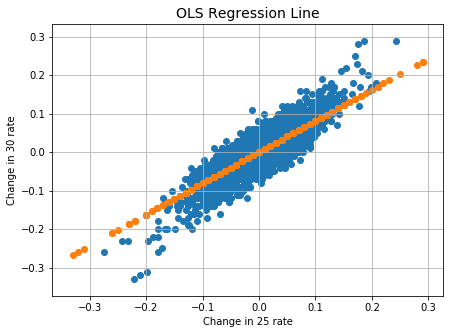

In [91]:
x = USYieldsRtn['DGS25']
y = USYieldsRtn['DGS30']
y_fitted = model_yield_2.predict(Xnew)
plt.figure(1, figsize=(7,5)) 
plt.scatter(x,y)
plt.scatter(X,y_fitted)
plt.title('OLS Regression Line', size = 14)
plt.xlabel('Change in 25 rate')
plt.ylabel('Change in 30 rate')
plt.grid()
plt.savefig("OLS_yield25")